Data exploration of Costa Rican energy generation during October 2016. The data was obtained from https://www.kaggle.com/maulberto3/crc-electric-energy. 

Costa Rican is famous for producing almost of all of it's electricity needs via renewable methods. The aim of this analysis will be to show the energy production needs of the country on an hourly basis and with what mix of renewable sources.

In [37]:
#import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

df = pd.read_csv("SEN oct-2016.csv")

df.head()

,Planta (CENCE),Hora,Dia,Mes,Ano,Tipo de Empresa,Fuente,Tipo de Fuente,Produccion (MWh)
0,Aeroenergia,0,10/1/2016,10,2016,Privada,Eolica,Eolica,0.9639
1,Aeroenergia,1,10/1/2016,10,2016,Privada,Eolica,Eolica,0.0452
2,Aeroenergia,2,10/1/2016,10,2016,Privada,Eolica,Eolica,0.4453
3,Aeroenergia,3,10/1/2016,10,2016,Privada,Eolica,Eolica,1.0051
4,Aeroenergia,4,10/1/2016,10,2016,Privada,Eolica,Eolica,1.6287


The first 5 rows of the dataset shows the number and type of dimensions in the data

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60264 entries, 0 to 60263
Data columns (total 9 columns):
Planta (CENCE)      60264 non-null object
Hora                60264 non-null int64
Dia                 60264 non-null object
Mes                 60264 non-null int64
Ano                 60264 non-null int64
Tipo de Empresa     58776 non-null object
Fuente              58776 non-null object
Tipo de Fuente      59520 non-null object
Produccion (MWh)    60264 non-null float64
dtypes: float64(1), int64(3), object(5)
memory usage: 4.1+ MB


Further information on the dataset, including number of valid entries for each column.

ANALYSIS 1 - Plot hourly production across the October 2016

In [3]:
# concatenate the hour and date columns
Time = [df.Dia[i] + " " + str(df.Hora[i]) for i in range(len(df))]

# use the strptime method of datetime to allow python to understand the date and hour information
Times = []
for k in range(len(Time)):
    Times.append(datetime.datetime.strptime(Time[k], "%m/%d/%Y %H"))

#calculate the elapsed hours for each
elapsed_hours = np.array([hour - Times[0] for hour in Times]) / datetime.timedelta(hours = 1)

# add elapsed_hours to dataframe
df["Elapsed_Hours"] = pd.Series(elapsed_hours)

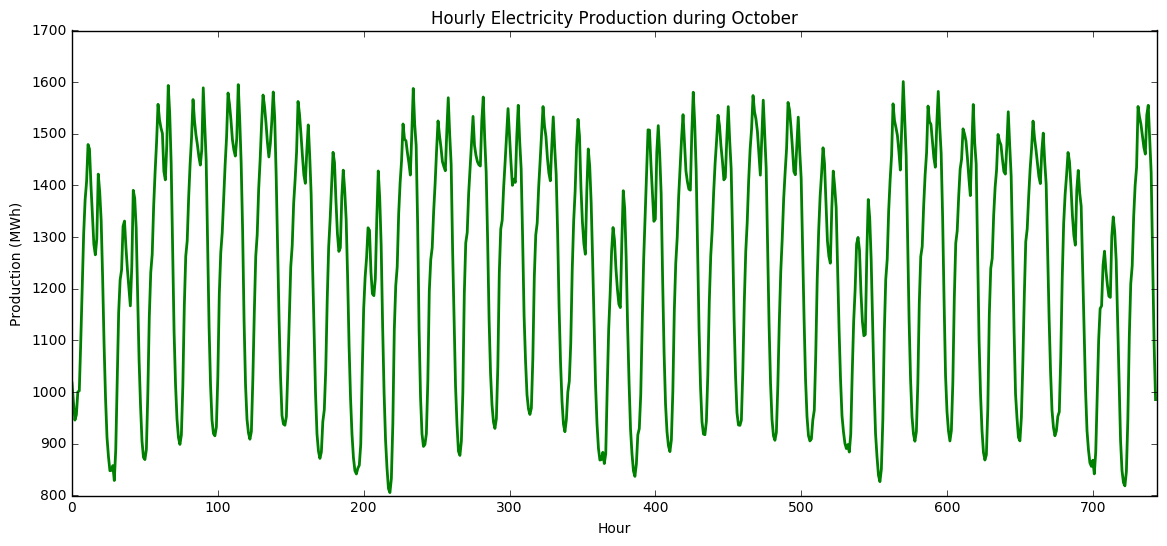

In [6]:
# Create new group
hourly_production = df.groupby("Elapsed_Hours")["Produccion (MWh)"].sum()

#plot results
x = np.unique(elapsed_hours)    
y = hourly_production
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,1,1)
ax.plot(x, y, "-", color="green", linewidth=2)
plt.xlim(0,744)
plt.xlabel("Hour")
plt.ylabel("Production (MWh)")
plt.title("Hourly Electricity Production during October")

plt.show()

The above graph shows how electricity produced changed across the month in hourly increments

ANALYSIS 2 - Differentiate Hourly Production by Source

In [38]:
production_sources = df.groupby("Tipo de Fuente")["Produccion (MWh)"].sum()
sources = list(pd.unique(df["Tipo de Fuente"]))
bar_y = production_sources
log_bar_y = np.log10(production_sources)

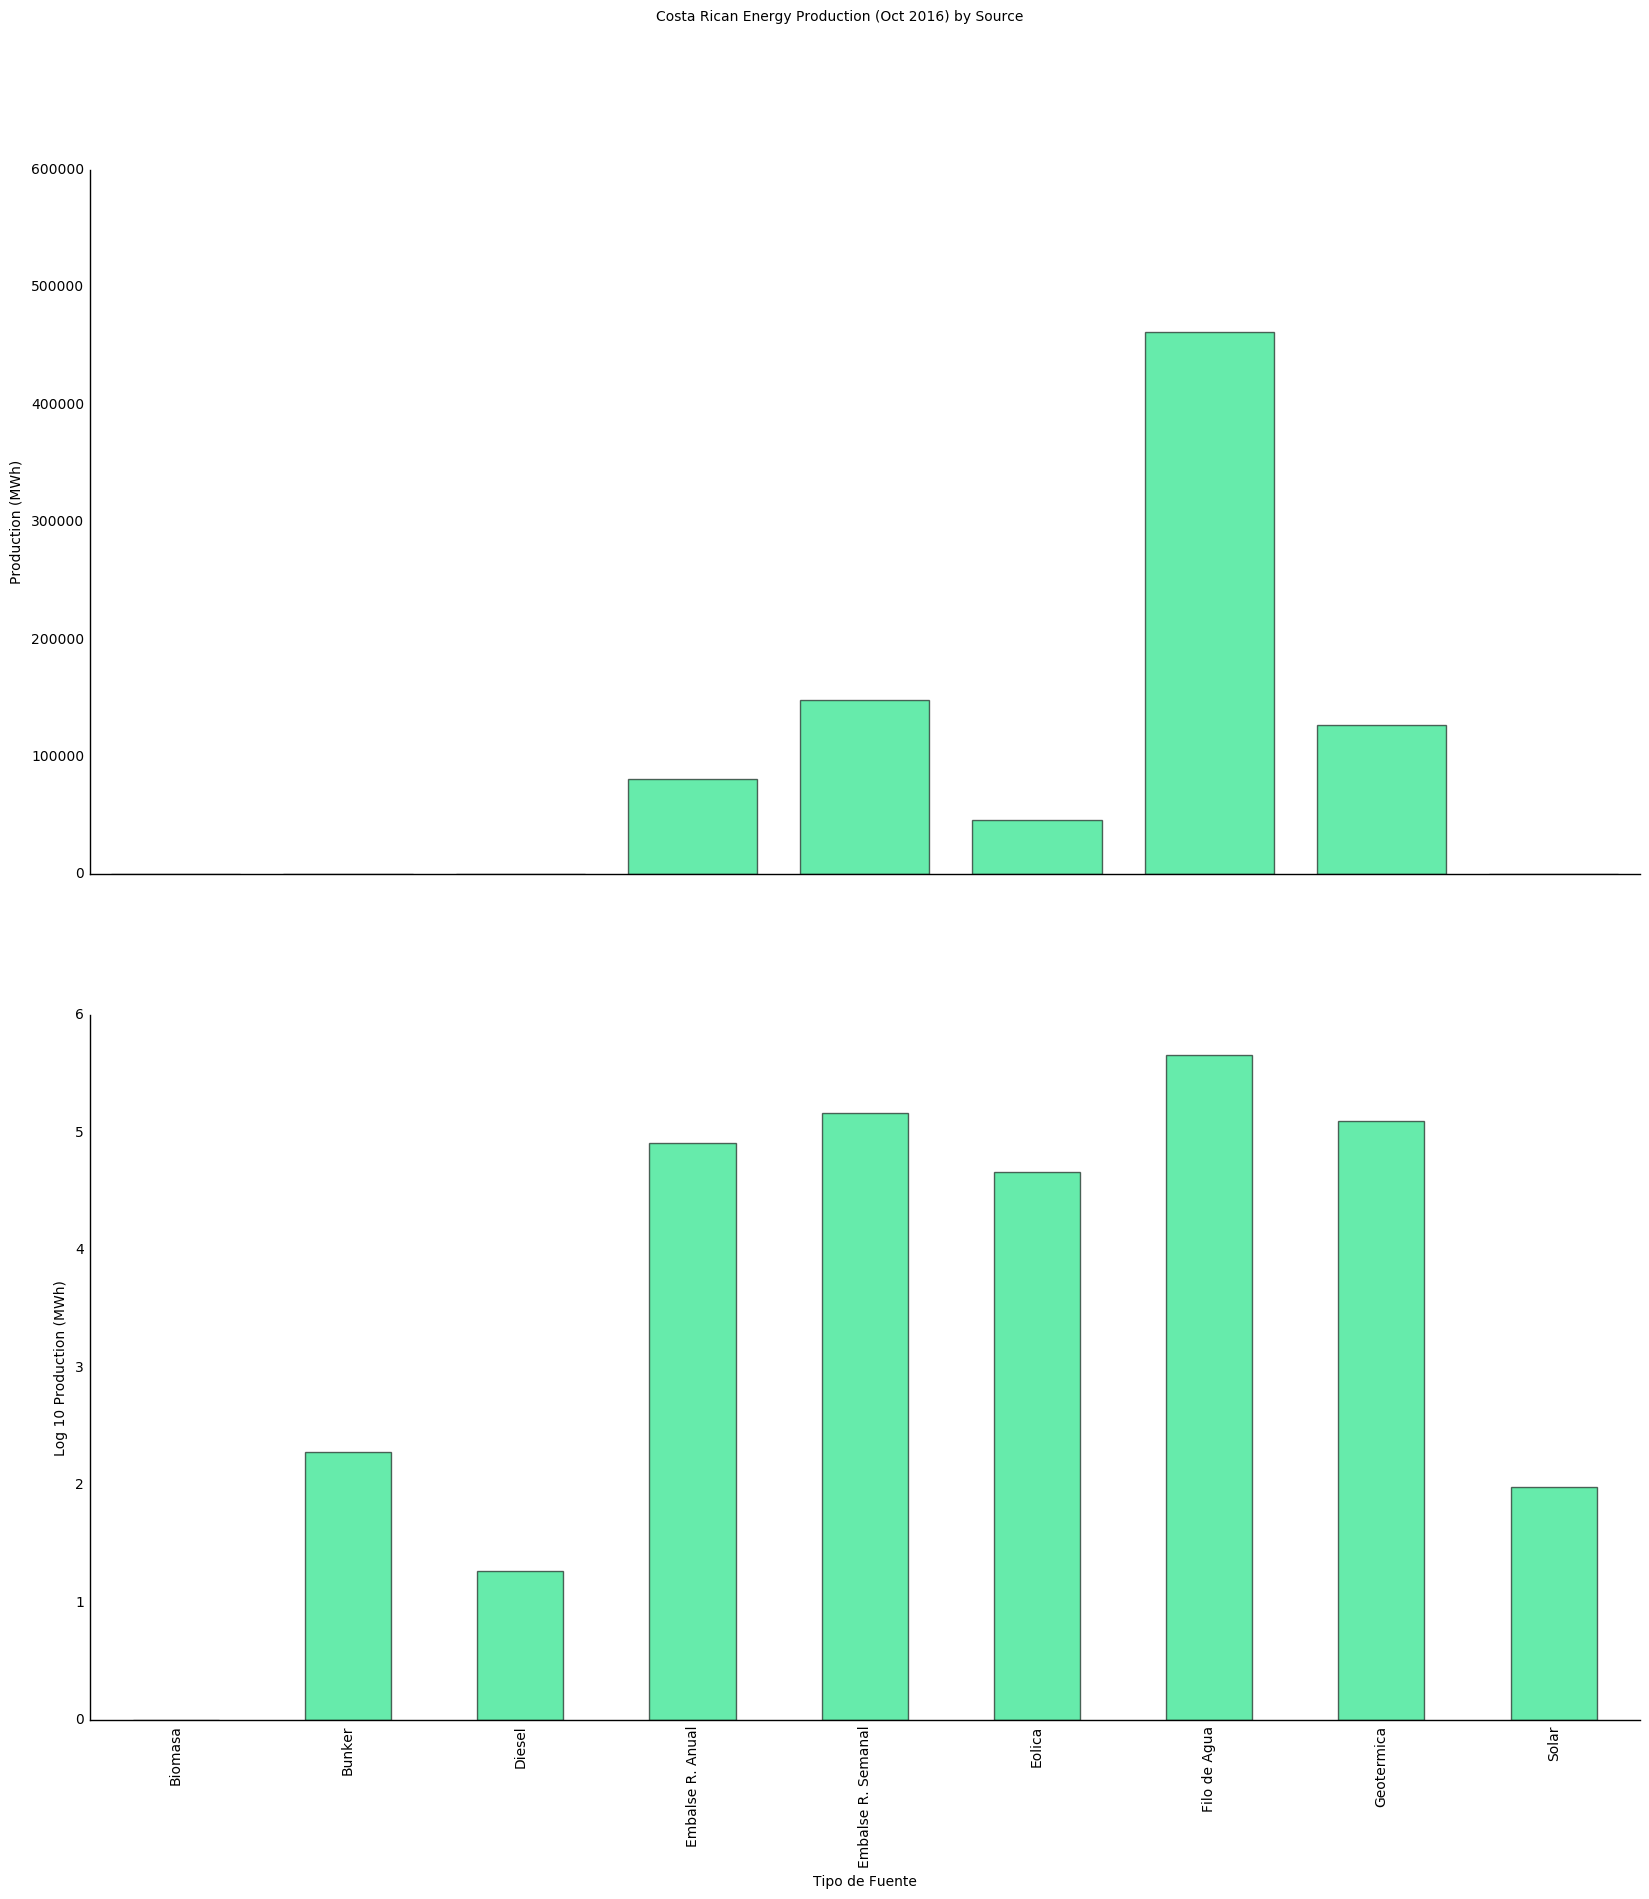

In [43]:
# set plot parameters and style
fig = plt.figure(figsize=(20,20))           #plot main figure
ax1 = fig.add_subplot(211)                   # define subplot
ax2 = fig.add_subplot(212,sharex=ax1)
ttl = "Costa Rican Energy Production (Oct 2016) by Source"
a = 0.6                                     # set transparency
c = "#01DF74"

#list of figures
axList = [ax1, ax2]
#set common figure parameters
for ax in axList:
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    ax.set_frame_on(True)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

#set individual axes limits
ax1.set_ylim(-200, 600000)

#define axes labels
ax1.set_ylabel("Production (MWh)")

#ax1
bar_y.plot.bar(color=c, ax=ax1, alpha=a,width = 0.75)
#ax2
log_bar_y.plot.bar(color=c, ax=ax2, alpha=a,)
plt.ylabel("Log 10 Production (MWh)")
plt.suptitle("Costa Rican Energy Production (Oct 2016) by Source")
plt.show()

<p>Above: bar chart showing absolute energy production in MWh by source.<p>
<p>Below: bar chart showing energy production to log<sub>10<sub>.<p>

Note, the sources (Tipo de Fuente) are in Spanish, this is corrected later.

ANALYSIS 3 - Private vs Public Production

   How private and public generation differ in their sources.

In [34]:
#get indices that relate to Private and Public generation
priv_ind = []
pub_ind = []
for i in range(len(df)):
    if df.ix[i, "Tipo de Empresa"] == "Privada":
        priv_ind.append(i)
    elif df.ix[i, "Tipo de Empresa"] == "Publica":
        pub_ind.append(i)

private_sources = df.ix[priv_ind].groupby("Fuente")["Produccion (MWh)"].sum()
public_sources = df.ix[pub_ind].groupby("Fuente")["Produccion (MWh)"].sum()
public_sources["Biomasa"] = 0


In [44]:
#create new dataframe to house collated data from  above

    #ensure the number of "sources" (rows) are the same for publc and private
pp = pd.Series(public_sources).to_frame()
pp["Private"] = pd.Series(private_sources).to_frame()
pp["Public"] = pd.Series(public_sources).to_frame()

#create Source column
pp["Source"] = pp.index
# translate sources from spanish to english
new_source = ["Wind", "Geothermal", "Wave", "Hydroelectric", "Solar", "Thermal", "Biomass"]
pp["New Source"] = new_source

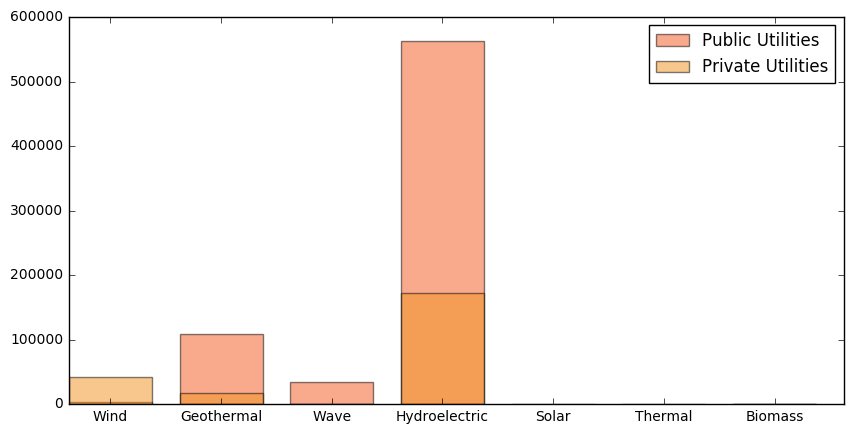

In [36]:
bar_l = np.linspace(1, 7, 7, dtype=int)
f, ax1 = plt.subplots(1, figsize=(10,5))
bar_width = 0.75
public = pp['Public']
private = pp["Private"]
tick_pos = [i+(bar_width/2) for i in bar_l]
ax1.bar(bar_l,
        # using the public data
        public,
        # set the width
        width=bar_width,
        # with the label pre score
        label='Public Utilities',
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#F4561D')

ax1.bar(bar_l,
        # using the private data
        private,
        # set the width
        width=bar_width,
        # with pre_score on the bottom
        #bottom=public,
        # with the label mid score
        label='Private Utilities',
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#F1911E')

plt.ylim(0, 600000)
plt.xticks(tick_pos ,pp["New Source"])
plt.legend()

plt.show()
